## Notebook Imports

In [87]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Gather Data

[Source: Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
# Show list of attributes
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data points and features

In [6]:
type(boston_dataset.data)

numpy.ndarray

In [7]:
boston_dataset.data.shape  #503 rows, 13 col

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# Actual prices in thousands 000's
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Exploration with Pandas dataframes

In [10]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add a column with the price (target)
data['PRICE'] = boston_dataset.target

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.count()  #Shows us entries per column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data -check for missing values

In [13]:
# Checking empty values in our datasets
# Pandas checking all col all entries
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing Data -Histograms, Distributions and Bar Charts

#### Using the attribute 'PRICE' from our dataset

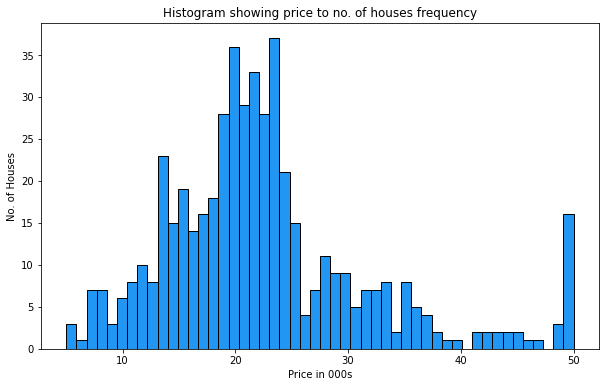

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')

plt.xlabel('Price in 000s')
plt.ylabel('No. of Houses')
plt.title('Histogram showing price to no. of houses frequency')

plt.show()

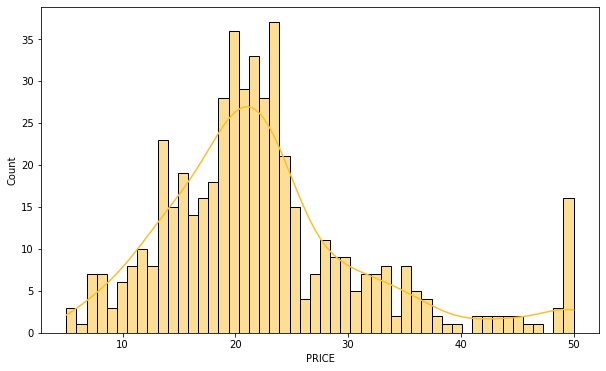

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data['PRICE'], bins=50, kde=True, color="#fbc02d")
plt.show()

#### Using the attribute 'RM' from our dataset. RM=Avg room per dwelling

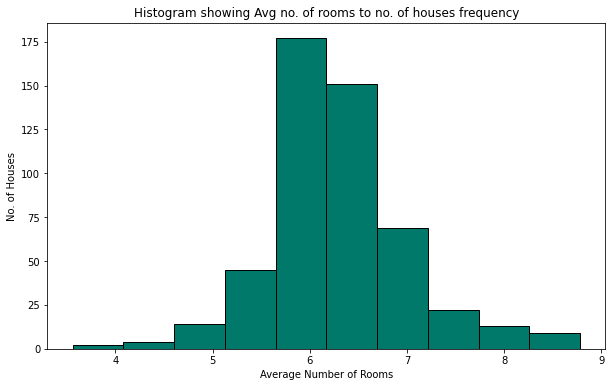

In [17]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color='#00796b')

plt.xlabel('Average Number of Rooms')
plt.ylabel('No. of Houses')
plt.title('Histogram showing Avg no. of rooms to no. of houses frequency')

plt.show()

In [18]:
# Avg rooms in a house in boston
data['RM'].mean()

6.284634387351787

#### Using the attribute 'RAD' from our dataset. RAD=Accessibility from radial highways

In [19]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

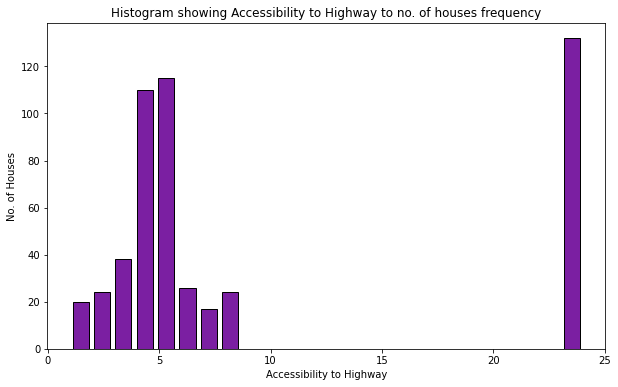

In [20]:
plt.figure(figsize=(10,6))
#bins=24 because RAD has data range from 1-24
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.75)

plt.xlabel('Accessibility to Highway')
plt.ylabel('No. of Houses')
plt.title('Histogram showing Accessibility to Highway to no. of houses frequency')

plt.show()

In [21]:
frequency = data['RAD'].value_counts()
type(frequency)  #pandas.core.series.Series

pandas.core.series.Series

In [22]:
#As freq is of type pandas series so we can grab all its value using our variable
#frequency.index   #Method1
frequency.axes[0]  #Method2

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

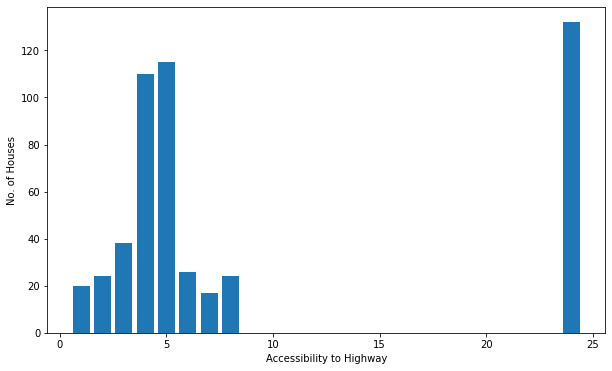

In [23]:
# Create Bar chart
plt.figure(figsize=(10,6))

plt.xlabel('Accessibility to Highway')
plt.ylabel('No. of Houses')

plt.bar(frequency.index, height=frequency)  #(x,y)
plt.show()

#### Using the attribute 'CHAS' from our dataset. CHAS= Houses located on the Charles River.

In [24]:
data['CHAS'].value_counts()   #1 or 0 are called dummy variables

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [25]:
data['PRICE'].min()   #Minimum house price in boston

5.0

In [26]:
data['PRICE'].max()   #Maximum house price in boston

50.0

In [27]:
data.min()            #If want to check all columns min values at once

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [28]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [29]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [30]:
data.describe()    #50% here is the median value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho_{XY}=corr(X,Y) $$
### $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [31]:
# Correlation b/w property price and avg no of rooms attribute
# Hence the output is +ve, means the larger the property(means expensive) the more rooms it has
data['PRICE'].corr(data['RM'])

0.695359947071539

In [32]:
# Correlation b/w property price and pupil teacher ratio
# PTRATIO measures quality of school and education
# Schools with many kids and few teachers
# Strongly a -ve correlation
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [33]:
data.corr()  #Pearson coorelation(Default)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
# An array with count of total data.corr() relations with 0. as value
mask = np.zeros_like(data.corr())

# This will retrieve the indices for the top traingle of the array
triangle_indices = np.triu_indices_from(mask) 

# To select just those cells and change their values
mask[triangle_indices] = True

# To print
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Visualizing Correlations with a Heatmap

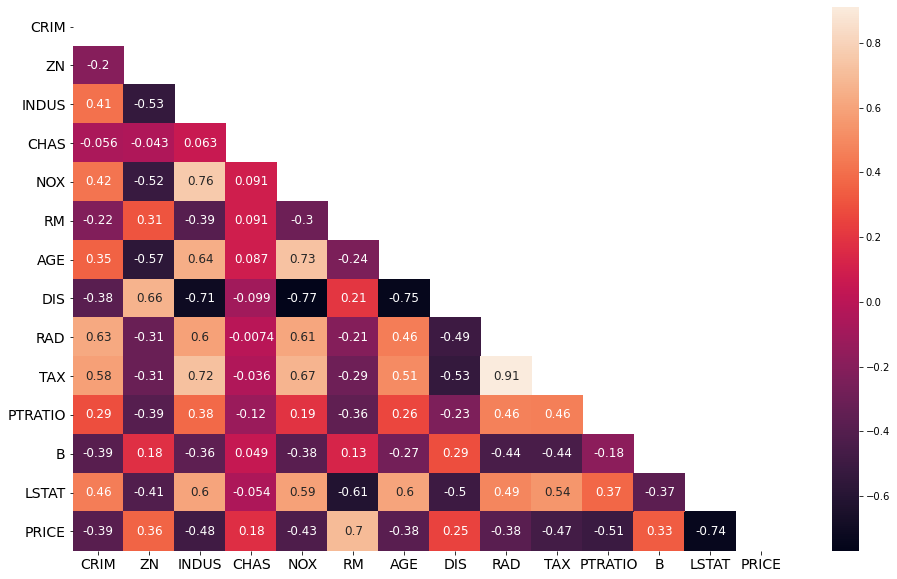

In [35]:
plt.figure(figsize=(16,10))

sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### Relationship between pollution(NOX) and distance(DIS)

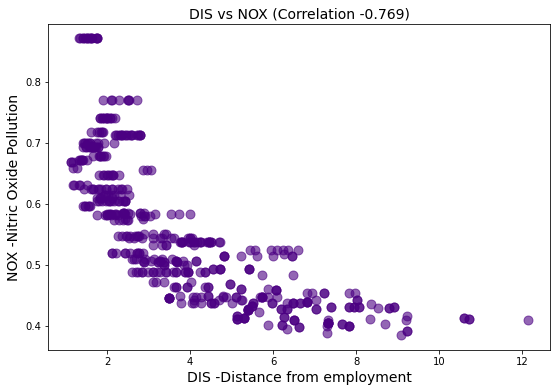

In [42]:
# To calc corr between NOX and DIS
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3) #round corr for 3 decimal places

# Plotting scatter plot using seaborn
plt.figure(figsize=(9,6))

plt.scatter(x=data['DIS'], y=data['NOX'], s=80, alpha=0.6, color='indigo')

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS -Distance from employment', fontsize=14)
plt.ylabel('NOX -Nitric Oxide Pollution', fontsize=14)

plt.show()

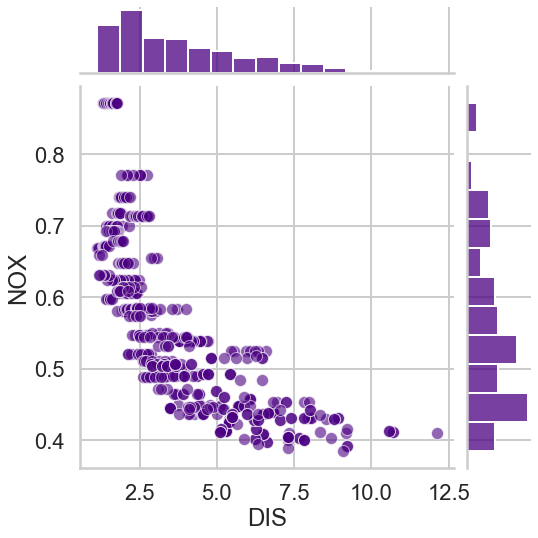

In [58]:
# Plotting scatter plot using seaborn

sns.set()  #Reset to default styling
sns.set_context('poster')  #content themes
sns.set_style('whitegrid')

sns.jointplot(x=data['DIS'], y=data['NOX'], height=8, color='indigo', joint_kws={'alpha': 0.6})
plt.show()

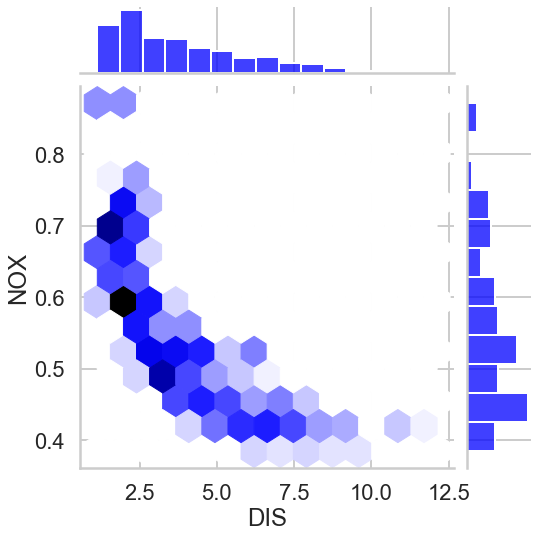

In [60]:
# Plotting scatter plot using seaborn

sns.set()  #Reset to default styling
sns.set_context('poster')  #content themes
sns.set_style('whitegrid')

# Exlporing kind param, it is default set to scatter
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', height=8, color='blue')
plt.show()

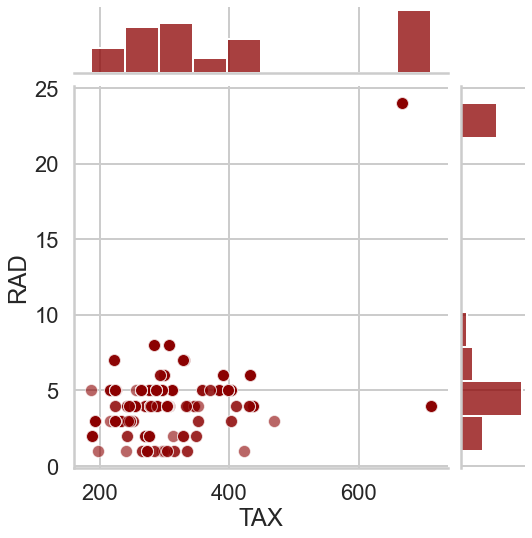

In [61]:
# Plotting scatter plot using seaborn

sns.set()  #Reset to default styling
sns.set_context('poster')  #content themes
sns.set_style('whitegrid')

sns.jointplot(x=data['TAX'], y=data['RAD'], height=8, color='darkred', joint_kws={'alpha': 0.6})
plt.show()

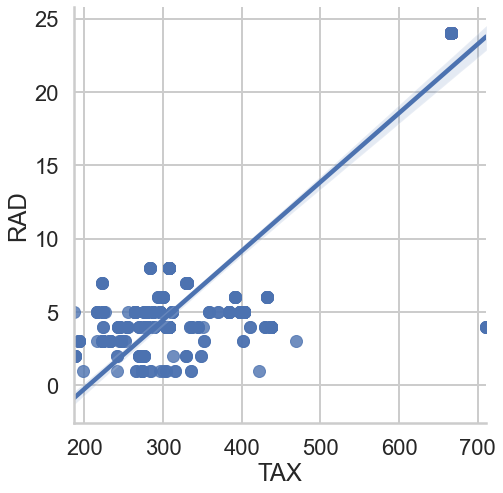

In [67]:
# Plotting linear regression between two features(TAX and RAD) on this chart
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

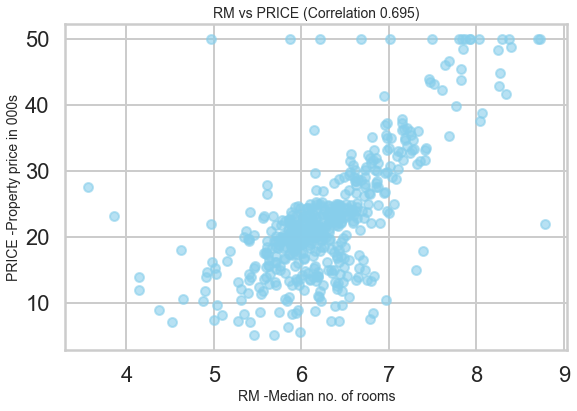

In [68]:
# To calc corr between RM and PRICE
rm_target_corr = round(data['RM'].corr(data['PRICE']), 3) #round corr for 3 decimal places

# Plotting scatter plot using seaborn
plt.figure(figsize=(9,6))

plt.scatter(x=data['RM'], y=data['PRICE'], s=80, alpha=0.6, color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_target_corr})', fontsize=14)
plt.xlabel('RM -Median no. of rooms', fontsize=14)
plt.ylabel('PRICE -Property price in 000s', fontsize=14)

plt.show()

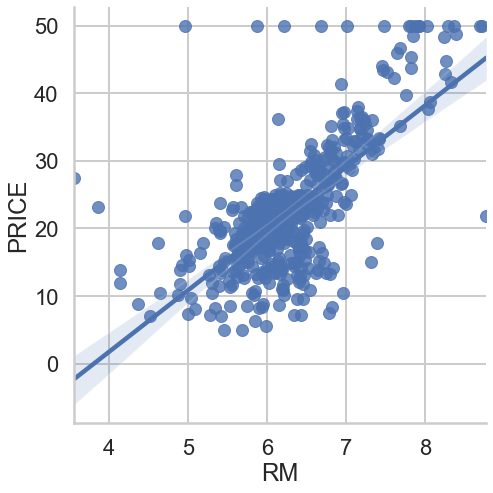

In [69]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

## Seaborn pairplots

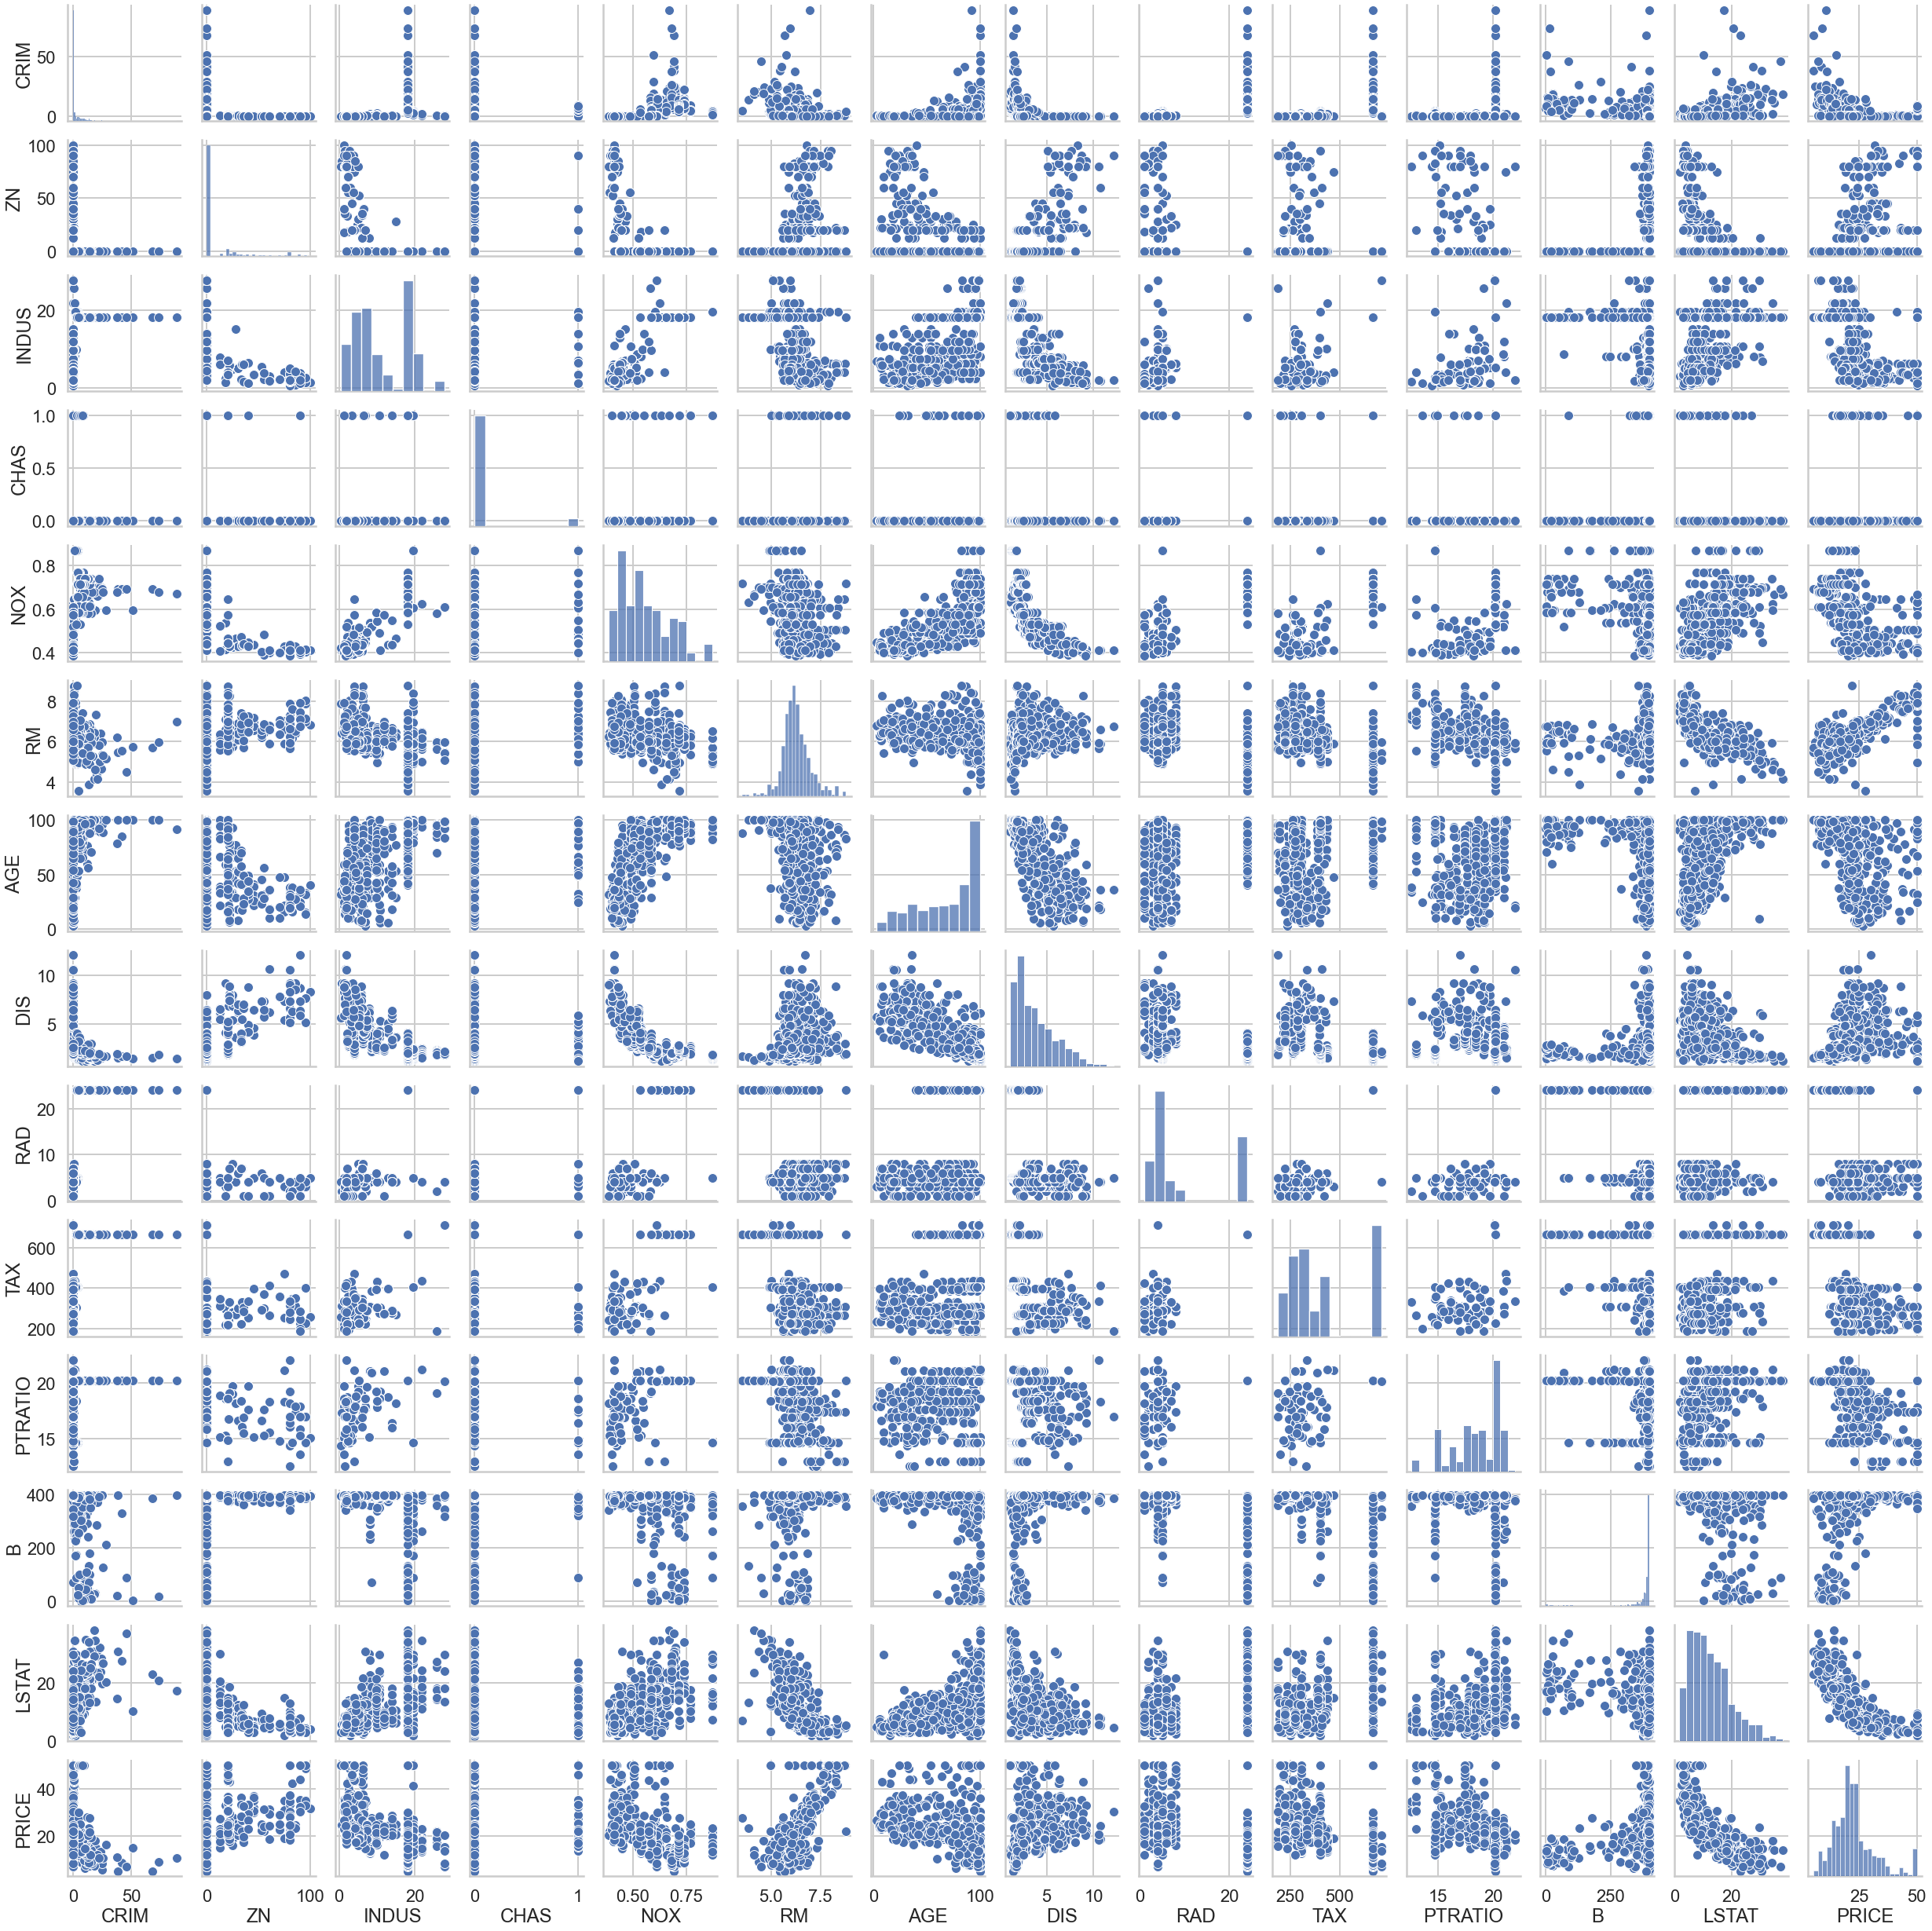

CPU times: user 19.3 s, sys: 98.1 ms, total: 19.4 s
Wall time: 19.5 s


In [72]:
%%time 

sns.pairplot(data) 
plt.show()

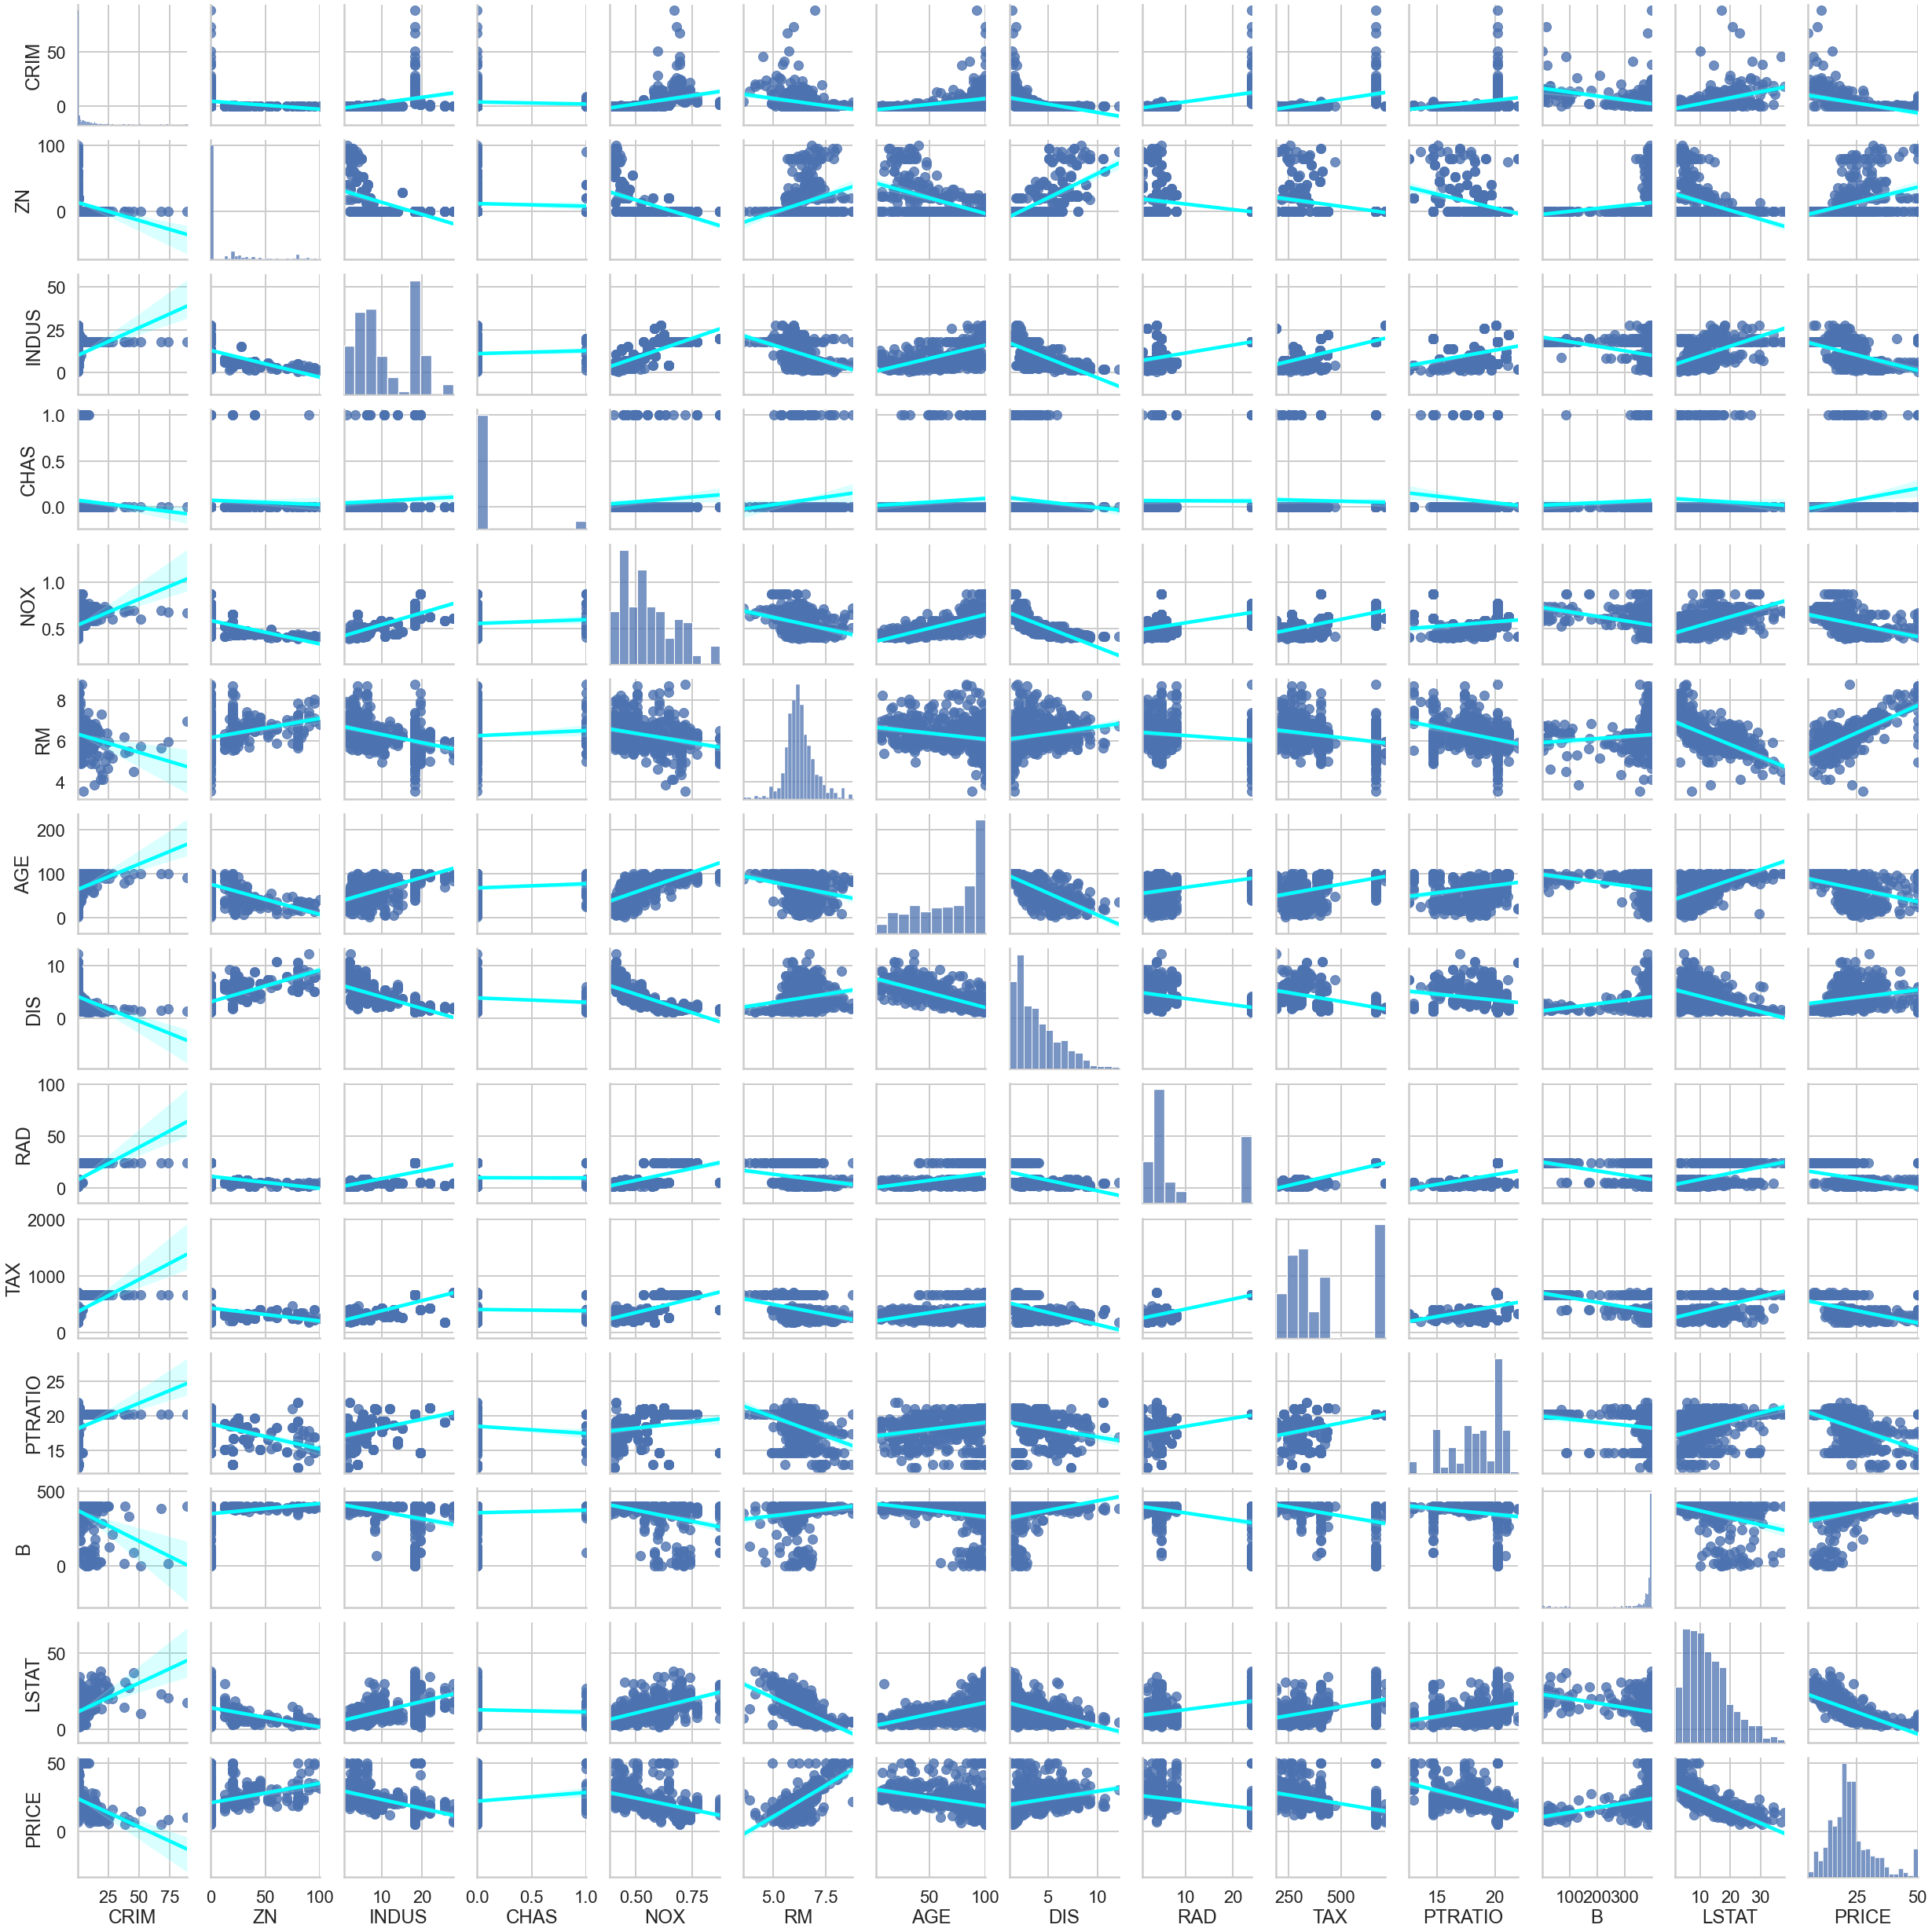

CPU times: user 2min 9s, sys: 575 ms, total: 2min 9s
Wall time: 36.3 s


In [73]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws': {'color': 'cyan'}})   #To plot regression
plt.show()

## Training & Test Dataset Split

In [84]:
prices = data['PRICE']

# This will not include price column, axis=1 means col, axis=0 means row
features = data.drop('PRICE', axis=1)  

# Tuple unpacking (test_size=20%, random_state=10; for random shuffle)
X_train, X_test, y_train, y_text = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# % of training set i.e 80%
len(X_train)/len(features)

0.7984189723320159

In [86]:
# % of test data set i.e 20%
#len(X_test)/len(features)  #OR
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [101]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# R-squared for training and test dataset
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_text))

print('Intercept:',regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept: 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082
